# Assignment 01

## Exercise 1 : Machine Learning (general)
**(a) Define the terms “supervised learning”, “unsupervised learning”, and “reinforcement learning”.**  
  *  *supervised learning:* Learn a function from a set of **input-output-pairs** i.e. labeled data. An important branch of supervised learning is automated classification e.g. linear and logistic regression, Naive Bayes, Candidate Elimination
  *  *unsupervised learning:*  Identify indirect hidden structures, patterns or features in the input data **(does not use output data)**. Important subareas of unsupervised learning include automated categorization (e.g. via cluster analysis), parameter optimization and feature extraction e.g. Neural Networks
  *  *reinforcement learning:* Learn, adapt, or optimize a behavior strategy in order to maximize the own benefit **(earn the greatest reward)** by interpreting feedback that is provided by the environment. e.g. agent-based

**(b) Sketch for each learning paradigm a typical problem together with a description of its technical realization.**
  *  *supervised learning:* Spam Filter based on a dataset that contains already classified mail as spam or non-spam mail. Naive-Bayes algorithm to classify new mail.
  *  *unsupervised learning:*  Categorization of objects with multiple attributes with cluster analysis.
  *  *reinforcement learning:*  Solve a task with indirect feedback e.g. win a game   


## Exercise 2 : Machine Learning (general)
**(a) Which design decisions are to be made during the [development of a learning system](https://medium.com/@yaelg/product-manager-guide-part-3-developing-a-machine-learning-model-from-start-to-finish-c3e12fd835e4)?**
- choose object function:
    *  Which interesting aspects of the real world are accessed in the model world (restricted to particular—typically easily measurable—features x)
- search and identify potential inputs:
    *  How would an expert in the space approach this problem?
    *  Which are the important classes of model functions?
    *  Which methods are used to fit (= learn) model functions?
- define quality metrics:
    *  Which measures are used to assess the goodness of fit?
    *  How does the example number affect the learning process?
    *  How does noise affect the learning process?

**(b) What is the difference between inductive learning and deductive reasoning (= learning through deduction)?**
  *  *Inductive bias* is the set of assumptions that, together with the training data, deductively justify the classification by the learner to future instances i.e. based on evidence you have collected so far. 
  *   In *deductive reasoning*, a conclusion is reached reductively by applying general rules which hold over the domain i.e. make statements that are entailed by facts (not applicable to statistical learning since it does not construct a hypothesis).  
  *  A learning algorithm without inductive bias has no directive to classify unseen examples. Put another way: the learner cannot generalize (only memorize).

**(c) Name an example of a problem which cannot be solved by learning. Explain your answer.**  
e.g. The halting problem for Turing machines is an undecidable classification problem.

## Exercise 3 : Linear Regression
The table below describes four cars by their age and stopping distance for a full braking at 100km/h till stop.

In [2]:
from numpy import array, transpose
from pandas import DataFrame
data = array([[5, 7, 15, 28], [30530, 90000, 159899, 270564], [50, 79, 124, 300]])
DataFrame(data.transpose(), columns=["Age (year)", "Mileage (km) ", "Stopping distance (meter)"]) #, columns=["Wartburg", "Moskvich", "Lada", "Trabi"])

,Age (year),Mileage (km),Stopping distance (meter)
0,5,30530,50
1,7,90000,79
2,15,159899,124
3,28,270564,300


**(a) Determine the weights wi for the linear regression for the age variable.**

In [17]:
from numpy import mean
w1 = sum((data[0] - mean(data[0]))*(data[2] - mean(data[2])))/sum((data[0] - mean(data[0]))**2)
w0 = mean(data[2]) - w1 * mean(data[0])
func = lambda x: w0 + w1 * x
print("w0 = ", w0)
print("w1 = ", w1)

w0 =  -7.3190512624330495
w1 =  10.586840091813313


**(b) Extrapolate the expected average stopping distance for a 15-year old car. Note: use the model from (a).**

In [18]:
print("y(15) = ", func(15))

y(15) =  151.48355011476664


**(d) Draw a scatter plot of the data and the linear regression for a variable of your choice.**

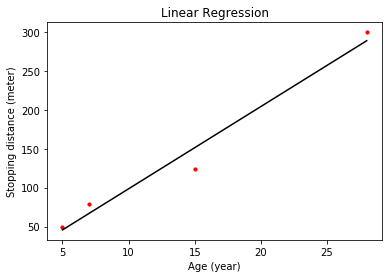

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('Age (year)')
plt.ylabel('Stopping distance (meter)')
plt.title('Linear Regression')
plt.scatter(data[0], data[2], 10, c="r")
plt.plot(data[0], func(data[0]), c="k")
plt.show()

## Exercise 4 : Basic Data Analysis and Linear Regression
(a) Download Fisher’s Iris data set from www.math.uah.edu/stat/data/Fisher.html. Write a Python program that reads the data set into memory and computes the mean, minimum and maximum of the petal width, petal length, sepal width and sepal length attributes for each of the three species of flower. Which of the species will be easy to distinguish, and which will be hard?

In [8]:
from numpy import array, mean, transpose
from sklearn import datasets
iris = datasets.load_iris()

print("sepal length in cm")
mins = [min(iris.data[iris.target == i, 0]) for i in set(iris.target)]
maxs = [max(iris.data[iris.target == i, 0]) for i in set(iris.target)]
means = [mean(iris.data[iris.target == i, 0]) for i in set(iris.target)]
from pandas import DataFrame
data = array([['Iris-Setosa','Iris-Versicolour', 'Iris-Virginica'], mins, maxs, means])
DataFrame(data.transpose(), columns=["Class", "Min", "Max", "Mean"])


sepal length in cm


,Class,Min,Max,Mean
0,Iris-Setosa,4.3,5.8,5.006
1,Iris-Versicolour,4.9,7.0,5.936
2,Iris-Virginica,4.9,7.9,6.587999999999998


(b) Using the matplotlib library, draw a scatter plot that shows the petal length attribute on the x-axis, and the sepal length attribute on the y-axis. Use different colors for the three different species and label the axes.


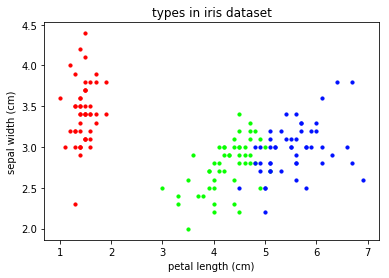

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('petal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('types in iris dataset')

cmap = plt.cm.get_cmap('hsv', 4)
for j in range(3): 
    plt.scatter(iris.data[iris.target == j,2], iris.data[iris.target == j,1], s=10, c=cmap(j))
  
plt.show()

(c) Create a subset of the Iris data that contains only the sepal length attribute, and only the setosa and virginica classes. Draw a scatterplot showing the attribute on the x-axis and the class on the y-axis. Using the LMS algorithm given in the lecture, compute the weight vector (w0, w1), and add the line of best fit to your plot. What is the residual sum of squares (RSS) for your weight vector?

In [10]:
from numpy import concatenate, ones
c = concatenate((iris.target[iris.target == 0], iris.target[iris.target == 2])).T
x = concatenate((iris.data[iris.target == 0, 0], iris.data[iris.target == 2, 0]))
x = array([ones(x.shape[0]), x]).T


In [11]:
from numpy import zeros, dot
from numpy.random import randint, uniform


# least mean square
def lms(x, c, iterations=10000, eta=1e-5, w=uniform(low=-1.0, high=1.0, size=2)):
    count = 0
    
    dw = zeros(2)
    while count < iterations:    
        i = randint(0, x.shape[0])
        error = c[i] - dot(w, x[i])
        dw = eta * error * x[i]
        #print(i," : dw = ", dw)

        w += dw
        #print("w= ", w)
        count += 1
        
        if sum((c - x.dot(w))**2) < 1e-3: break

    return w

In [20]:
w = lms(x, c)
reg = lambda x: w[0] + w[1] * array(x)
clas = lambda x: 2 if reg(x) > 1 else 0

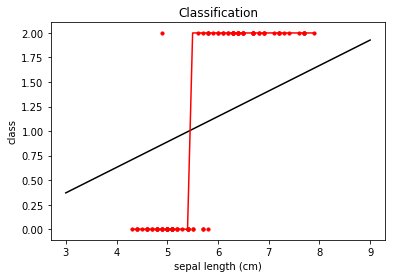

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import sort

plt.xlabel('sepal length (cm)')
plt.ylabel('class')
plt.title('Classification')
plt.scatter(x[:,1], c, s=10, c='r')  
plt.plot([3,9], reg([3,9]), c='k')
plt.plot(sort(x[:,1]), [clas(xi) for xi in sort(x[:,1])], c='r')
plt.show()